In [ ]:
#Topics
1.GROUP BY
2.Concat
3.Merge

In [18]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Johnny\OneDrive\Desktop\Excel\group_by.csv")
df

,day,city,temperature,windspeed,event
0,02-03-2022,newyork,32,6,Rain
1,03-03-2022,newyork,25,7,Sunny
2,04-03-2022,newyork,20,8,Snow
3,05-03-2022,newyork,26,5,Rain
4,06-03-2022,newyork,67,9,Snow
5,07-03-2022,berlin,29,4,Rain
6,08-03-2022,berlin,35,6,Sunny
7,09-03-2022,berlin,33,9,Snow
8,10-03-2022,delhi,29,8,Rain
9,11-03-2022,delhi,30,7,Sunny


In [19]:
grouped_data = df.groupby('city')

In [20]:
for city, city_df in grouped_data:
    print(city)
    print(city_df)

barcelona
           day       city  temperature  windspeed  event
11  13-03-2022  barcelona           24          9   Snow
12  14-03-2022  barcelona           31          7  Sunny
berlin
          day    city  temperature  windspeed  event
5  07-03-2022  berlin           29          4   Rain
6  08-03-2022  berlin           35          6  Sunny
7  09-03-2022  berlin           33          9   Snow
delhi
           day   city  temperature  windspeed  event
8   10-03-2022  delhi           29          8   Rain
9   11-03-2022  delhi           30          7  Sunny
10  12-03-2022  delhi           26          5   Rain
newyork
          day     city  temperature  windspeed  event
0  02-03-2022  newyork           32          6   Rain
1  03-03-2022  newyork           25          7  Sunny
2  04-03-2022  newyork           20          8   Snow
3  05-03-2022  newyork           26          5   Rain
4  06-03-2022  newyork           67          9   Snow


In [26]:
#to get specific group by

selected_cities = ['delhi', 'berlin']
for city in selected_cities:
    if city in grouped_data.groups:
        group = grouped_data.get_group(city)
        print("City:", city)
        print(group)
        print()
    else:
        print("City", city, "not found")

City: delhi
           day   city  temperature  windspeed  event
8   10-03-2022  delhi           29          8   Rain
9   11-03-2022  delhi           30          7  Sunny
10  12-03-2022  delhi           26          5   Rain

City: berlin
          day    city  temperature  windspeed  event
5  07-03-2022  berlin           29          4   Rain
6  08-03-2022  berlin           35          6  Sunny
7  09-03-2022  berlin           33          9   Snow



In [29]:
grouped_data.get_group("delhi")

,day,city,temperature,windspeed,event
8,10-03-2022,delhi,29,8,Rain
9,11-03-2022,delhi,30,7,Sunny
10,12-03-2022,delhi,26,5,Rain


In [30]:
#to find maximum temperature in each city
grouped_data.max()


,day,temperature,windspeed,event
city,,,,
barcelona,14-03-2022,31,9,Sunny
berlin,09-03-2022,35,9,Sunny
delhi,12-03-2022,30,8,Sunny
newyork,06-03-2022,67,9,Sunny


In [33]:
#average wind speed in each city
mean_windspeed = df.groupby('city')['windspeed'].mean()
print(mean_windspeed)

city
barcelona    8.000000
berlin       6.333333
delhi        6.666667
newyork      7.000000
Name: windspeed, dtype: float64


In [34]:
mean_temperature = df.groupby('city')['temperature'].mean()
mean_temperature

city
barcelona    27.500000
berlin       32.333333
delhi        28.333333
newyork      34.000000
Name: temperature, dtype: float64

In [35]:
grouped_data.describe()

temperature                                                        \
                count       mean        std   min    25%   50%    75%   max   
city                                                                          
barcelona         2.0  27.500000   4.949747  24.0  25.75  27.5  29.25  31.0   
berlin            3.0  32.333333   3.055050  29.0  31.00  33.0  34.00  35.0   
delhi             3.0  28.333333   2.081666  26.0  27.50  29.0  29.50  30.0   
newyork           5.0  34.000000  18.934096  20.0  25.00  26.0  32.00  67.0   

          windspeed                                               
              count      mean       std  min  25%  50%  75%  max  
city                                                              
barcelona       2.0  8.000000  1.414214  7.0  7.5  8.0  8.5  9.0  
berlin          3.0  6.333333  2.516611  4.0  5.0  6.0  7.5  9.0  
delhi           3.0  6.666667  1.527525  5.0  6.0  7.0  7.5  8.0  
newyork         5.0  7.000000  1.581139  5.0  6.0  7.0  8.0  9.0

Matplotlib is building the font cache; this may take a moment.


city
barcelona    Axes(0.125,0.11;0.775x0.77)
berlin       Axes(0.125,0.11;0.775x0.77)
delhi        Axes(0.125,0.11;0.775x0.77)
newyork      Axes(0.125,0.11;0.775x0.77)
dtype: object

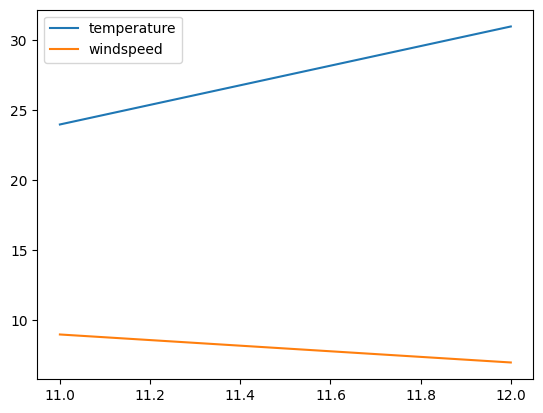

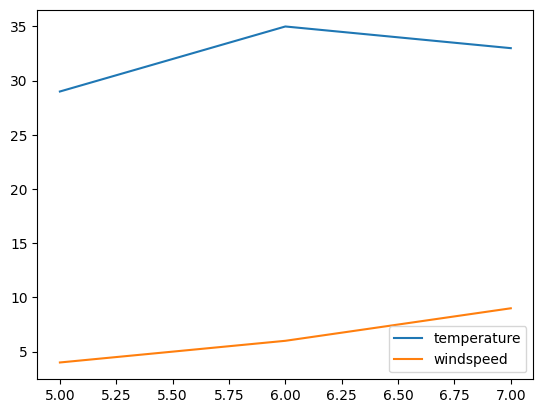

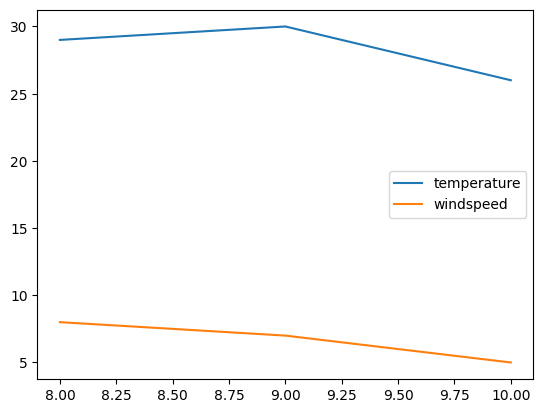

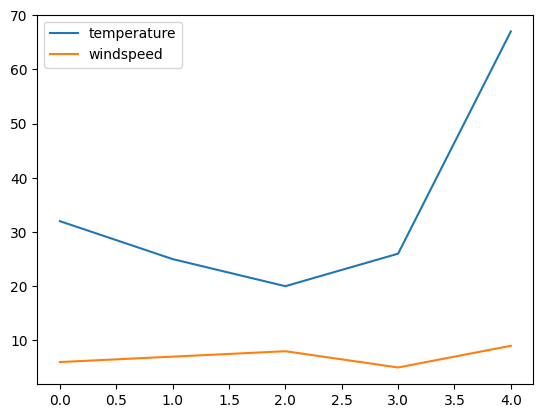

In [40]:
#printing line chart

%matplotlib inline
grouped_data.plot()

In [ ]:
#CONCAT DATAFRAMES

In [44]:
import pandas as pd

india_weather =pd.DataFrame ({
    "city" : ["mumbai", "delhi", "bengalore"],
    "temperature" : [32,30,24],
     "humidity" : [80, 85,70]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,30,85
2,bengalore,24,70


In [46]:
india_weather2 = pd.DataFrame ({
    "city" : ["lucknow", "ranchi", "guwahati"],
    "temperature" : [30, 31, 35],
    "humidity" : [85, 80, 84]
})
india_weather2

,city,temperature,humidity
0,lucknow,30,85
1,ranchi,31,80
2,guwahati,35,84


In [48]:
concat_df = pd.concat([india_weather, india_weather2])
concat_df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,30,85
2,bengalore,24,70
0,lucknow,30,85
1,ranchi,31,80
2,guwahati,35,84


In [49]:
#we can see that the index in lucknow is 0, we can avoid that by using ignore_index()
concat_df = pd.concat([india_weather, india_weather2], ignore_index = True)
concat_df

,city,temperature,humidity
0,mumbai,32,80
1,delhi,30,85
2,bengalore,24,70
3,lucknow,30,85
4,ranchi,31,80
5,guwahati,35,84


In [51]:
concat_df = pd.concat([india_weather, india_weather2], keys = ["north", "south"])
concat_df

city  temperature  humidity
north 0     mumbai           32        80
      1      delhi           30        85
      2  bengalore           24        70
south 0    lucknow           30        85
      1     ranchi           31        80
      2   guwahati           35        84

In [53]:
#"axis" argument in concat() function

#appending windspeed in column

# city, temperature, windspeed
temperature_df = pd.DataFrame ({
    "city" : ["mumbai", "delhi", "bengalore"],
    "temperature" : [32,30,24]
})
temperature_df

,city,temperature
0,mumbai,32
1,delhi,30
2,bengalore,24


In [54]:
windspeed_df = pd.DataFrame ({
    "city" : ["mumbai", "delhi", "bengalore"],
    "windspeed" : [7,6,9]
})
windspeed_df

,city,windspeed
0,mumbai,7
1,delhi,6
2,bengalore,9


In [56]:
concat_df = pd.concat([temperature_df, windspeed_df])
concat_df

,city,temperature,windspeed
0,mumbai,32.0,NaN
1,delhi,30.0,NaN
2,bengalore,24.0,NaN
0,mumbai,NaN,7.0
1,delhi,NaN,6.0
2,bengalore,NaN,9.0


In [57]:
#the column are not align properly, we can avoid by using "axis()"

concat_df = pd.concat([temperature_df, windspeed_df], axis = 1)
concat_df


,city,temperature,city,windspeed
0,mumbai,32,mumbai,7
1,delhi,30,delhi,6
2,bengalore,24,bengalore,9


In [58]:
#joining data frame with series

temperature_df

,city,temperature
0,mumbai,32
1,delhi,30
2,bengalore,24


In [60]:
series_df = pd.Series(["humid", "dry", "rain"], name = "event")
series_df

0    humid
1      dry
2     rain
Name: event, dtype: object

In [61]:
df = pd.concat([temperature_df, series_df], axis = 1)
df

,city,temperature,event
0,mumbai,32,humid
1,delhi,30,dry
2,bengalore,24,rain


In [ ]:
#MERGE

In [65]:
import pandas as pd
df1 = pd.DataFrame({
    "city" : ["mumbai", "delhi", "bengalore"],
    "temperature" : [32,30,24]
})
df1

,city,temperature
0,mumbai,32
1,delhi,30
2,bengalore,24


In [63]:
df2 = pd.DataFrame({
    "city" : ["mumbai", "delhi", "bengalore"],
    "humid" : [60,36,65]
})
df2

,city,humid
0,mumbai,60
1,delhi,36
2,bengalore,65


In [66]:
#inner() join 
df3 = pd.merge(df1, df2, on = "city")
df3

,city,temperature,humid
0,mumbai,32,60
1,delhi,30,36
2,bengalore,24,65


In [68]:
#outer join
df4 = pd.DataFrame({
    "city" : ["mumbai", "delhi", "bengalore", "ahmedabad"],
    "temperature" : [32,30,24,29]
})
df4

,city,temperature
0,mumbai,32
1,delhi,30
2,bengalore,24
3,ahmedabad,29


In [69]:
df5 = pd.DataFrame({
    "city" : ["jaipur", "delhi","lucknow", "bengalore"],
    "humid" : [60,26,65, 35]
})
df5

,city,humid
0,jaipur,60
1,delhi,26
2,lucknow,65
3,bengalore,35


In [71]:
df6 = pd.merge(df4, df5, on = "city")
df6

,city,temperature,humid
0,delhi,30,26
1,bengalore,24,35


In [72]:
#outer join
df6 = pd.merge(df4, df5, on = "city", how = "outer")
df6

,city,temperature,humid
0,mumbai,32.0,NaN
1,delhi,30.0,26.0
2,bengalore,24.0,35.0
3,ahmedabad,29.0,NaN
4,jaipur,NaN,60.0
5,lucknow,NaN,65.0


In [73]:
#left join
df6 = pd.merge(df4, df5, on = "city", how ="left")
df6

,city,temperature,humid
0,mumbai,32,NaN
1,delhi,30,26.0
2,bengalore,24,35.0
3,ahmedabad,29,NaN


In [74]:
#right join
df6 = pd.merge(df4, df5, on = "city", how ="right")
df6

,city,temperature,humid
0,jaipur,NaN,60
1,delhi,30.0,26
2,lucknow,NaN,65
3,bengalore,24.0,35


In [75]:
#to know from where does the NaN come from, use indicator()
df6 = pd.merge(df4, df5, on = "city", how = "outer", indicator= True)
df6

,city,temperature,humid,_merge
0,mumbai,32.0,NaN,left_only
1,delhi,30.0,26.0,both
2,bengalore,24.0,35.0,both
3,ahmedabad,29.0,NaN,left_only
4,jaipur,NaN,60.0,right_only
5,lucknow,NaN,65.0,right_only


In [77]:
#suffixes()

df1 = pd.DataFrame({
    "city" : ["mumbai", "delhi", "bengalore", "ahmedabad"],
    "temperature" : [32,30,24,29],
    "humidity" : [65,72,75,70]
})
df1

,city,temperature,humidity
0,mumbai,32,65
1,delhi,30,72
2,bengalore,24,75
3,ahmedabad,29,70


In [80]:
df2 = pd.DataFrame({
    "city" : ["jaipur", "delhi","lucknow", "bengalore"],
    "temperature" : [27,30,32,29],
    "humidity" : [60,26,65, 35]
})
df2

,city,temperature,humidity
0,jaipur,27,60
1,delhi,30,26
2,lucknow,32,65
3,bengalore,29,35


In [81]:
df3 = pd.merge(df1, df2, on = "city")
df3

,city,temperature_x,humidity_x,temperature_y,humidity_y
0,delhi,30,72,30,26
1,bengalore,24,75,29,35


In [83]:
#to fix the x, y in temperature, humidity

df3 = pd.merge(df1, df2, on = "city", suffixes = ('_left', '_right'))
df3

,city,temperature_left,humidity_left,temperature_right,humidity_right
0,delhi,30,72,30,26
1,bengalore,24,75,29,35
